# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Saidil Halim
- **Email:** saidilhalim25@gmail.com
- **ID Dicoding:** saidil_eyQS

## Menentukan Pertanyaan Bisnis

- musim apa yang paling banyak pengguna nya baik kasual maupun pengguna terdaftar
- Apa dampak dari kerja atau hari non-kerja pada pola penyewaan

## Import Semua Packages/Library yang Digunakan

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [167]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**Menilai tabel day_df**

In [168]:
# info data dan jumlah missing value data day_df
day_df.info()
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [169]:
#cek apakah ada duplikat dalam data_df
print("data duplikat ada: ", day_df.duplicated().sum())

data duplikat ada:  0


In [170]:
# mendeskripsikan data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tabel data tidak memiliki missing value dan duplicate
- tabel data memiliki kesalahan data type pada kolom dteday

### Cleaning Data

**Memperbaiki tipe data pada data day_df**

In [171]:
# mengubah data type column dteday dari object menjadi datetime
day_datetime_coloums = ["dteday"]
for column in day_datetime_coloums:
      day_df[column] = pd.to_datetime(day_df[column])

In [172]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Memperbaiki tipe data pada hour_df**

**Insight:**
- data type column dateby sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data

**Explore day_df**

In [173]:
# membuat mapping dari angka ke season_name
season_mapping = {
      1:"Spring",
      2:"Summer",
      3:"Fall",
      4:"Winter"
}

# menambahkan column season_name pada day_df
day_df["season_name"] = day_df["season"].map(season_mapping)
print(day_df[['season', 'season_name']].head())

   season season_name
0       1      Spring
1       1      Spring
2       1      Spring
3       1      Spring
4       1      Spring


In [174]:
# Membuat group untuk melihat min max pengguna pada setiap musim
day_df.groupby(by="season_name").agg({
      "casual" : ["max", "min"],
      "registered" : ["max", "min"]
 })

casual      registered     
               max  min        max  min
season_name                            
Fall          3160  118       6917  889
Spring        3155    9       5315  416
Summer        3410  120       6456  674
Winter        3031    2       6946   20

In [175]:
# menambah column day_names berdasarkan column weekday
day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_df['day_name'] = day_df['weekday'].apply(lambda x: day_names[x])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,day_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Wednesday


In [176]:
# Menambah column baru is_weeknd untuk mengetahui apakah hari adalah weekend
day_df['is_weekend'] = day_df['weekday'].isin([0, 6])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,day_name,is_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Saturday,True
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Sunday,True
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Monday,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Tuesday,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Wednesday,False


In [177]:
# membuat group untuk melihat pengguna dalam weekend dan weekdays
day_df.groupby(by=["is_weekend", "day_name"]).agg({
      "casual" : ["max", "min", "mean"],
      "registered" : ["max", "min", "mean"],
      "cnt" : ["max", "min", "mean"],
})

casual                  registered                     \
                        max min         mean        max   min         mean   
is_weekend day_name                                                          
False      Friday      2469  38   752.288462       6917  1129  3938.000000   
           Monday      3065   2   674.133333       6435    20  3663.990476   
           Thursday    1405  15   590.961538       6781   416  4076.298077   
           Tuesday     1348   9   556.182692       6697   573  3954.480769   
           Wednesday   2562   9   551.144231       6946   432  3997.394231   
True       Saturday    3410  57  1465.257143       5966   570  3085.285714   
           Sunday      3283  54  1338.295238       5657   451  2890.533333   

                       cnt                     
                       max   min         mean  
is_weekend day_name                            
False      Friday     8362  1167  4690.288462  
           Monday     7525    22  4338.123810  
           Thursday   7804   431  4667.259615  
           Tuesday    7767   683  4510.663462  
           Wednesday  8173   441  4548.538462  
True       Saturday   8714   627  4550.542857  
           Sunday     8227   605  4228.828571

## Visualization & Explanatory Analysis

### Pertanyaan 1: musim apa yang paling banyak pengguna nya baik kasual maupun pengguna terdaftar

In [178]:
# mengelompokkan data berdasarkan season dan menghitung jumlah total casual dan registered
season_summary = day_df.groupby(by="season").agg({
    'casual': 'sum',
    'registered': 'sum'
})

# menambahkan kolom total pengguna (casual + registered)
season_summary['total_users'] = season_summary['casual'] + season_summary['registered']

# menambahkan kolom nama musim
season_summary['season_name'] = season_summary.index.map(season_mapping)

# melihat hasilnya
print(season_summary)

        casual  registered  total_users season_name
season                                             
1        60622      410726       471348      Spring
2       203522      715067       918589      Summer
3       226091      835038      1061129        Fall
4       129782      711831       841613      Winter


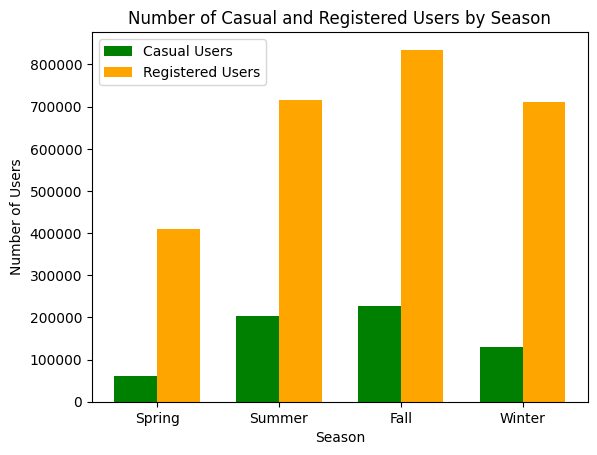

In [179]:
# membuat visualisasi data menggunakan bar chart
labels = season_summary['season_name']
casual_users = season_summary['casual']
registered_users = season_summary['registered']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, casual_users, width, label='Casual Users', color='green')
bar2 = ax.bar(x + width/2, registered_users, width, label='Registered Users', color='orange')

# label dan title chart
ax.set_xlabel('Season')
ax.set_ylabel('Number of Users')
ax.set_title('Number of Casual and Registered Users by Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.show()

### Pertanyaan 2: Apa dampak dari kerja atau hari non-kerja pada pola penyewaan

In [180]:
# Menghitung rata-rata untuk visualisasi
mean_values = day_df.groupby(by=["is_weekend", "weekday"]).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()


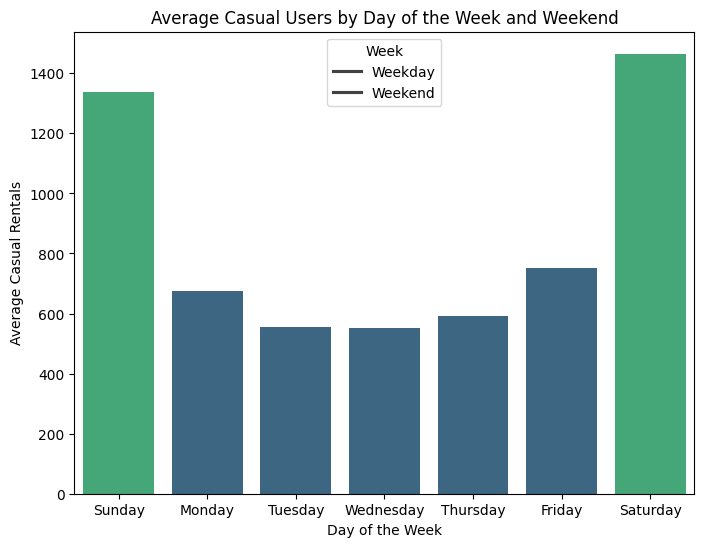

In [181]:
# membuat bar chart untuk pengguna casual
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_values, x='weekday', y='casual', hue='is_weekend', palette='viridis')
plt.title('Average Casual Users by Day of the Week and Weekend')
plt.xlabel('Day of the Week')
plt.ylabel('Average Casual Rentals')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.legend(title='Week', labels=['Weekday', 'Weekend'])
plt.show()

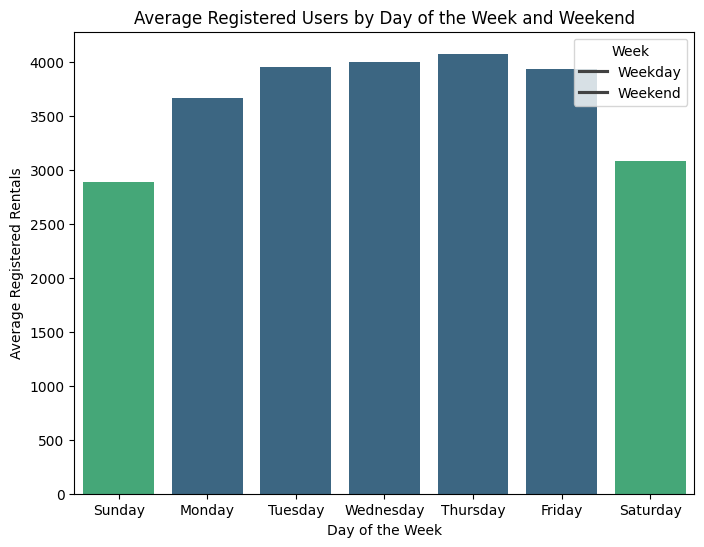

In [182]:
# Membuat bar chart untuk pengguna terdaftar 'registered'
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_values, x='weekday', y='registered', hue='is_weekend', palette='viridis')
plt.title('Average Registered Users by Day of the Week and Weekend')
plt.xlabel('Day of the Week')
plt.ylabel('Average Registered Rentals')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.legend(title='Week', labels=['Weekday', 'Weekend'])
plt.show()

## Analisis Lanjutan (Opsional)

### Manual Grouping

### pertanyaan : Bagaimana pola penyewaan pada hari kerja vs. hari libur?

In [183]:
# Mengelompokkan data berdasarkan 'workingday' dan 'holiday'
grouped_data = day_df.groupby(['workingday', 'holiday']).agg({
    'casual': ['mean', 'sum'],       # Rata-rata dan total penyewaan kasual
    'registered': ['mean', 'sum'],   # Rata-rata dan total penyewaan terdaftar
    'cnt': ['mean', 'sum']           # Rata-rata dan total penyewaan keseluruhan
}).reset_index()

# Rename columns agar lebih jelas
grouped_data.columns = ['Working Day', 'Holiday', 
                         'Average Casual Rentals', 'Total Casual Rentals', 
                         'Average Registered Rentals', 'Total Registered Rentals',
                         'Average Total Rentals', 'Total Rentals']

print(grouped_data)

   Working Day  Holiday  Average Casual Rentals  Total Casual Rentals  \
0            0        0             1401.776190                294373   
1            0        1             1064.714286                 22359   
2            1        0              606.570000                303285   

   Average Registered Rentals  Total Registered Rentals  \
0                 2987.909524                    627461   
1                 2670.285714                     56076   
2                 3978.250000                   1989125   

   Average Total Rentals  Total Rentals  
0            4389.685714         921834  
1            3735.000000          78435  
2            4584.820000        2292410  


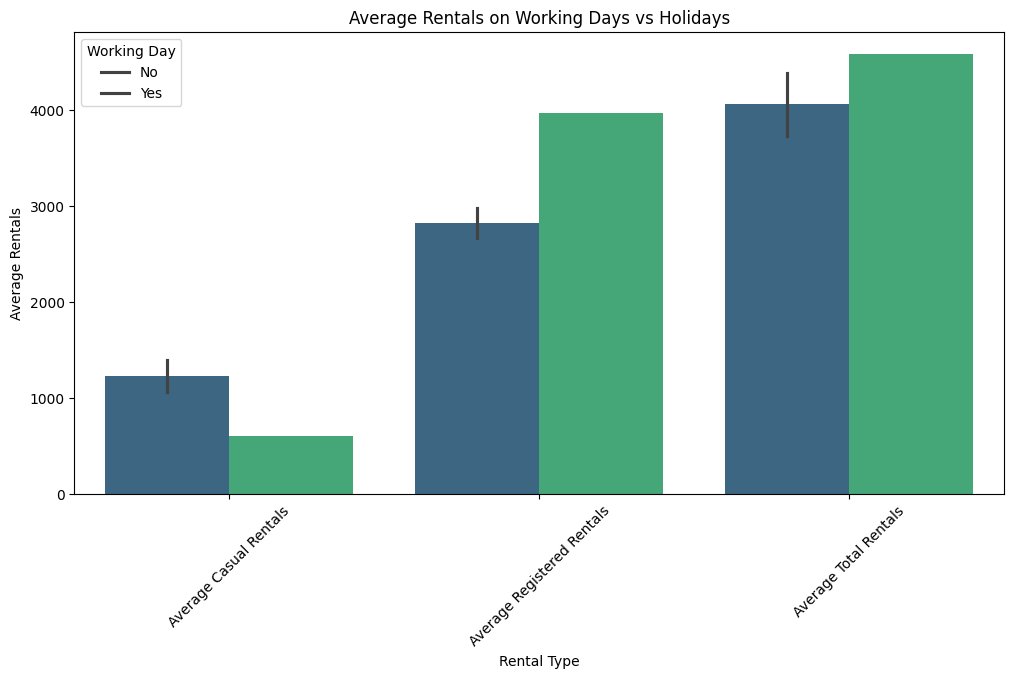

In [184]:
# membuat group untuk memudahkan ploting
melted_data = grouped_data.melt(id_vars=['Working Day', 'Holiday'], 
                                  value_vars=['Average Casual Rentals', 'Average Registered Rentals', 'Average Total Rentals'],
                                  var_name='Rental Type', value_name='Average Rentals')

# membuat plot chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Rental Type', y='Average Rentals', hue='Working Day', palette='viridis')
plt.title('Average Rentals on Working Days vs Holidays')
plt.xlabel('Rental Type')
plt.ylabel('Average Rentals')
plt.legend(title='Working Day', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Dari analisis data, musim yang paling banyak pengguna baik casual maupun registered terjadi pada musim gugur (fall) dan yang paling sedikit terjadi pada musim dingin (winter)

- Conclution pertanyaan 2 : Analisis menunjukkan bahwa pada hari kerja, penyewaan cenderung lebih tinggi dibandingkan dengan hari libur. Pengguna terdaftar lebih mendominasi pada hari kerja, sedangkan pengguna kasual lebih aktif pada akhir pekan.

- Conclution Option : Analisis menunjukkan bahwa pola penyewaan sepeda antara hari kerja dan hari libur sangat berbeda. Pada hari kerja, jumlah pengguna terdaftar cenderung lebih tinggi dibandingkan dengan pengguna kasual, sedangkan pada hari libur, jumlah pengguna kasual meningkat secara signifikan. 